In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x1 = tf.random.uniform(shape=[100, 8], maxval=1000, dtype=tf.float32, seed=7)
x2 = tf.random.normal([100, 8], mean=135.0, stddev=4.56, dtype=tf.float32, seed=7)

In [52]:
y = tf.reduce_sum(tf.matmul(x1, tf.random.normal([8,1], mean=58, stddev=2.3)) + tf.matmul(x2, tf.random.uniform([8,1],maxval=250 )) + \
    tf.random.normal([100, 8], mean=0, stddev=1), axis=1, keepdims=True)

In [53]:
y.shape

TensorShape([100, 1])

In [27]:
y.ndim

2

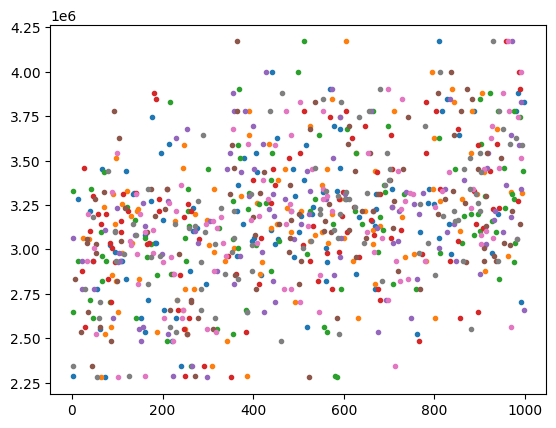

In [54]:
plt.plot(x1, y, '.')

In [15]:
y[90:96, :]

<tf.Tensor: shape=(6, 8), dtype=float32, numpy=
array([[389193.78, 389196.03, 389194.5 , 389193.97, 389195.28, 389194.75,
        389193.38, 389195.3 ],
       [343093.47, 343094.53, 343093.5 , 343094.7 , 343094.78, 343094.47,
        343093.62, 343093.97],
       [380026.84, 380027.78, 380025.22, 380025.7 , 380027.03, 380026.6 ,
        380027.03, 380027.16],
       [370906.88, 370907.25, 370908.66, 370907.7 , 370906.84, 370906.94,
        370907.66, 370907.88],
       [456492.97, 456493.06, 456492.3 , 456494.47, 456492.2 , 456494.84,
        456493.7 , 456493.7 ],
       [345785.8 , 345787.4 , 345787.5 , 345785.84, 345785.5 , 345785.56,
        345783.88, 345785.28]], dtype=float32)>

In [48]:
## Let's assign some weights iititally:

w_x1 = tf.Variable(tf.random.normal([8,1], mean=0, stddev=1))          # Initialize the weights for x2
w_x2= tf.Variable(tf.random.normal([8,1], mean=0, stddev=1))           # Initialize the weights for x2



Alpha = 0.0001              # Learning Rate

bias = tf.Variable(tf.random.uniform([1,], minval=-1, maxval=1))                                         # Initialize the bias term

def prediction(x1, x2):
    y_hat = tf.reduce_sum(tf.matmul(x1,w_x1) + tf.matmul(x2, w_x2) + bias, axis=1, keepdims=True)
    return y_hat



def loss(true_label, prediction):

    SSR = tf.reduce_sum(tf.square(true_label-prediction))                           # Compute SSR
    SSM = tf.reduce_sum(tf.square(true_label-tf.reduce_mean(true_label)))           # Compute SSM
    n = tf.cast(len(true_label), tf.float32)
    k = tf.cast((tf.shape(x1)[1] + tf.shape(x2)[1] + 1), tf.float32)

    R2_score = 1 - SSR/(SSM+1e-10)
    adj_R2 = 1 - ( (1-R2_score)*(n-1))/ (n-1-k)

    MSE = tf.reduce_mean(tf.square(true_label-prediction))

    return R2_score, adj_R2, MSE

def train(x1,x2, y):

    with tf.GradientTape() as tape:
        
        y_hat = prediction(x1, x2)

        R2, adj_R2, MSE = loss(y, y_hat)
        

        dloss_dw1, dloss_dw2, dloss_bias = tape.gradient(MSE, [w_x1, w_x2, bias])
        dloss_dw1 = tf.clip_by_value(dloss_dw1, -1.0, 1.0)
        dloss_dw2 = tf.clip_by_value(dloss_dw2, -1.0, 1.0)
        dloss_bias = tf.clip_by_value(dloss_bias, -1.0, 1.0)

    w_x1.assign_sub(Alpha*dloss_dw1)
    w_x2.assign_sub(Alpha*dloss_dw2)
    bias.assign_sub(Alpha*dloss_bias)

    return w_x1, w_x2, bias


for epoch in range(1000):

    w_x1, w_x2, bias = train(x1, x2, y)

    # Print MSE in every 100 epochs
    if epoch%100==0:
        y_hat = prediction(x1, x2)
        R2, adj_R2, MSE = loss(y, y_hat)
        print(f'Epoch {epoch} MSE = {MSE.numpy()}, R2 Score = {R2.numpy()}, Adjusted R2 Score = {adj_R2.numpy()}')
        

Epoch 0 MSE = 8248164352000.0, R2 Score = -53.35033416748047, Adjusted R2 Score = -64.61808776855469
Epoch 100 MSE = 8247868653568.0, R2 Score = -53.348384857177734, Adjusted R2 Score = -64.61573791503906
Epoch 200 MSE = 8247574528000.0, R2 Score = -53.34645080566406, Adjusted R2 Score = -64.6134033203125
Epoch 300 MSE = 8247279878144.0, R2 Score = -53.34450912475586, Adjusted R2 Score = -64.61105346679688
Epoch 400 MSE = 8246985228288.0, R2 Score = -53.342567443847656, Adjusted R2 Score = -64.60871124267578
Epoch 500 MSE = 8246691627008.0, R2 Score = -53.34062957763672, Adjusted R2 Score = -64.60636901855469
Epoch 600 MSE = 8246396977152.0, R2 Score = -53.338687896728516, Adjusted R2 Score = -64.6040267944336
Epoch 700 MSE = 8246102327296.0, R2 Score = -53.33674621582031, Adjusted R2 Score = -64.6016845703125
Epoch 800 MSE = 8245807677440.0, R2 Score = -53.33480453491211, Adjusted R2 Score = -64.59933471679688
Epoch 900 MSE = 8245513027584.0, R2 Score = -53.332862854003906, Adjusted R

In [56]:
tf.__version__

'2.10.1'